## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
import pickle
import logging
warnings.filterwarnings('ignore')

## Defining Log File

In [2]:
logging.basicConfig(filename='traininglog.log', level=logging.INFO,
                    format='%(levelname)s:%(asctime)s:%(message)s')
logger = logging.getLogger(__name__)

## Loading and Analyzing the Dataset

In [3]:
logger.info('Loading dataset')
data= pd.read_csv("C:/Users/AMANDEEP/Downloads/internship/UCI_Credit_Card.csv")
pd.set_option('display.max_columns', 500)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
logger.info('Analyzing data...')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [5]:
data.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64

In [6]:
data = data.rename(index=str,columns={'ID':'Id','LIMIT_BAL':'Limit',
                              'SEX':'Sex','EDUCATION':'Education','MARRIAGE':'Marriage',
                              'AGE':'Age','PAY_5':'Pay_may','PAY_6':'Pay_april',
                              'PAY_0':'Pay_sept','PAY_2':'Pay_aug','PAY_3':'Pay_july','PAY_4':'Pay_june',
                              'BILL_AMT1':'Bill_sept','BILL_AMT2':'Bill_aug','BILL_AMT3':'Bill_july',
                              'BILL_AMT4':'Bill_june','BILL_AMT5':'Bill_may','BILL_AMT6':'Bill_april',
                              'PAY_AMT1':'Amt_sept','PAY_AMT2':'Amt_aug','PAY_AMT3':'Amt_july',
                              'PAY_AMT4':'Amt_june','PAY_AMT5':'Amt_may','PAY_AMT6':'Amt_april',
                              'default.payment.next.month':'Default_pay'})

In [7]:
data.describe()

,Id,Limit,Sex,Education,Marriage,Age,Pay_sept,Pay_aug,Pay_july,Pay_june,Pay_may,Pay_april,Bill_sept,Bill_aug,Bill_july,Bill_june,Bill_may,Bill_april,Amt_sept,Amt_aug,Amt_july,Amt_june,Amt_may,Amt_april,Default_pay
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


There are 30,000 distinct credit card clients.

The average value for the amount of credit card limit is 167,484. The standard deviation is unusually large, max value being 1M.

Education level is mostly graduate school and university.

Most of the clients are either marrined or single (less frequent the other status).

Average age is 35.5 years, with a standard deviation of 9.2.

As the value 0 for default payment means 'not default' and value 1 means 'default', the mean of 0.221 means that there are 22.1% of credit card contracts that will default next month.

In [8]:
data.duplicated().value_counts()

False    30000
dtype: int64

The largest number of credit cards are with limit of 50,000 (3365), followed by 20,000 (1976) and 30,000 (1610).

In [9]:
data=data.drop('Id',axis=1)

In [10]:
df1= data.copy()

## Explore the target variable

0    23364
1     6636
Name: Default_pay, dtype: int64


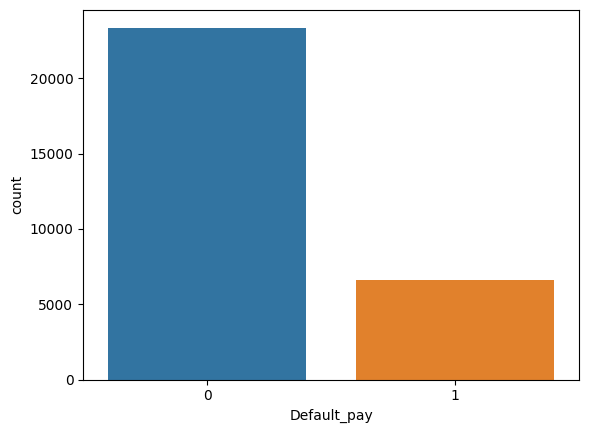

In [42]:
logger.info('Exploring the target variables...')
print(data['Default_pay'].value_counts())
sns.countplot(x='Default_pay',data=data)
plt.show()

6636 out of 30000 (22%) of clients will default next time.

<AxesSubplot:xlabel='Age', ylabel='Density'>

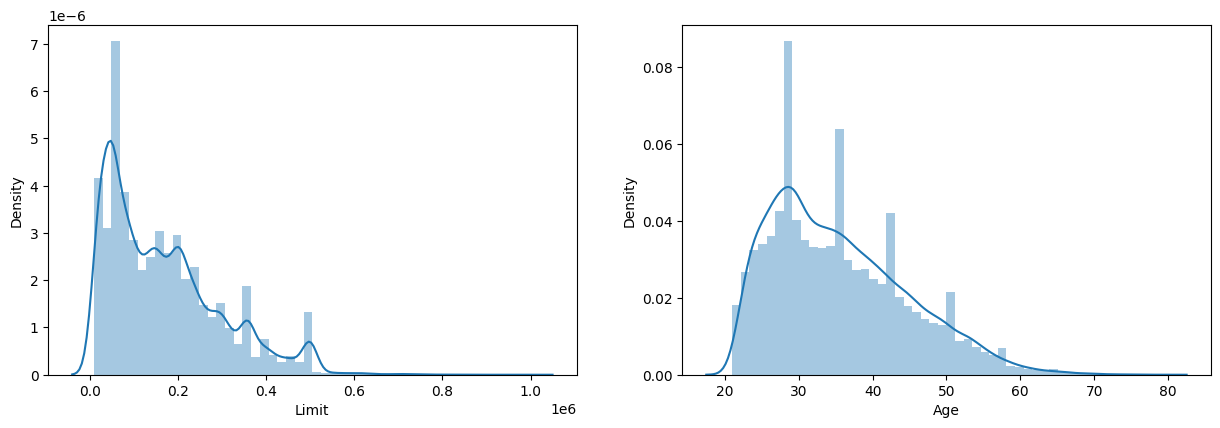

In [13]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(data["Limit"])
plt.subplot(2,2,2)
sns.distplot(data['Age'])

Dataset consists of skewed data of limiting balance and age of clients.

We have more number of clients having limiting balance between 0 to 200000 currency.

We have more number of clients from age bracket of 20 to 40, i.e., clients from mostly young to mid aged groups.

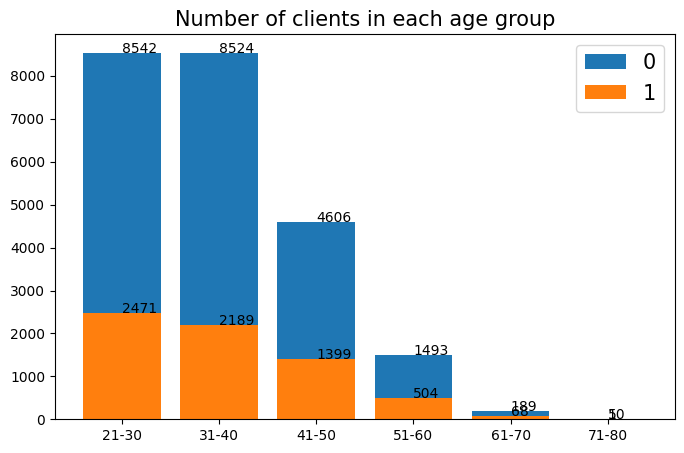

In [14]:
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
df1['AGE_BIN'] = pd.cut(x=df1['Age'], bins=bins, labels=names, right=True)

age_cnt = df1.AGE_BIN.value_counts()
age_0 = (df1.AGE_BIN[df1['Default_pay'] == 0].value_counts())
age_1 = (df1.AGE_BIN[df1['Default_pay'] == 1].value_counts())

plt.subplots(figsize=(8,5))
plt.bar(age_0.index, age_0.values, label='0')
plt.bar(age_1.index, age_1.values, label='1')
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=10)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

We have maximum clients from 21-30 age group followed by 31-40. Hence with increasing age group the number of clients that will default the payment next month is decreasing. Hence we can see that Age is important feature to predict the default payment for next month.

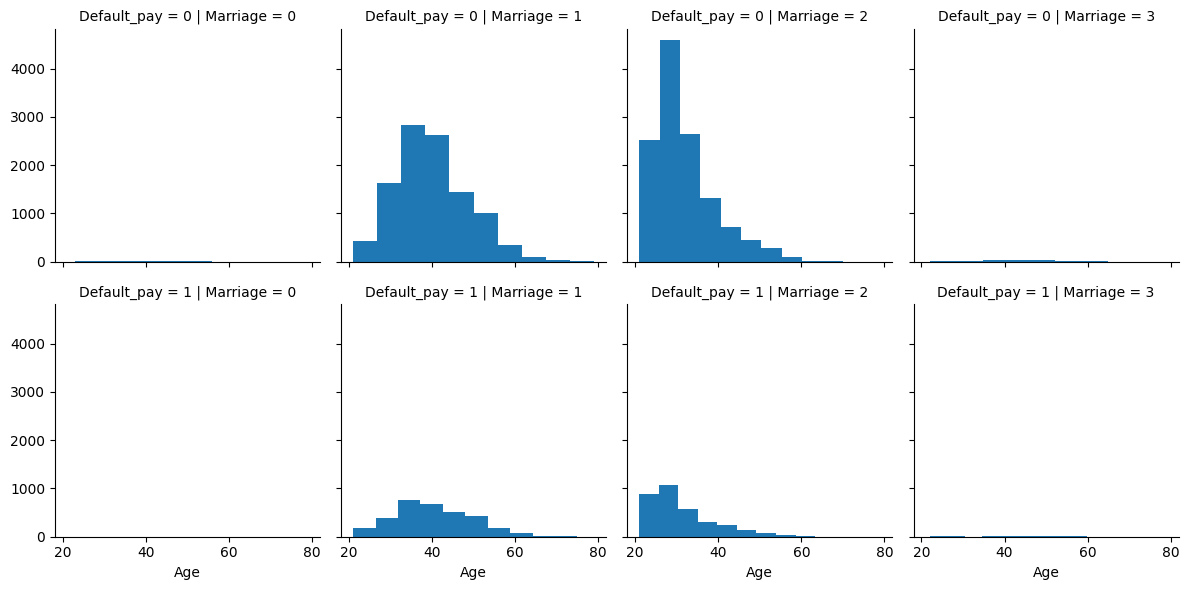

In [15]:
g = sns.FacetGrid(df1, row='Default_pay', col='Marriage')
g = g.map(plt.hist, 'Age')
plt.show()

Married people between age bracket of 30 and 50 and unmarried clients of age 20-30 tend to default payment with unmarried clients higher probability to default payment. Hence we can include MARRIAGE feature of clients to find probability of defaulting the payment next month

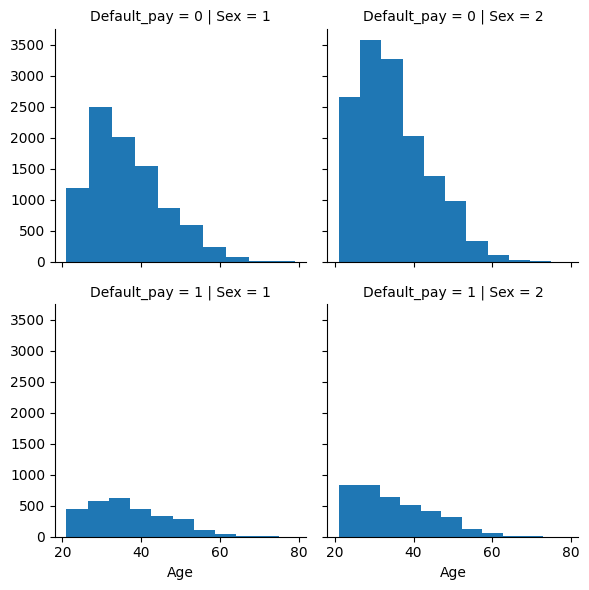

In [16]:
g = sns.FacetGrid(df1, row='Default_pay', col='Sex')
g = g.map(plt.hist, 'Age')
plt.show()

Females of age group 20-30 have very high tendency to default payment compared to males in all age brackets. Hence we can keep the SEX column of clients to predict probability of defaulting payment.

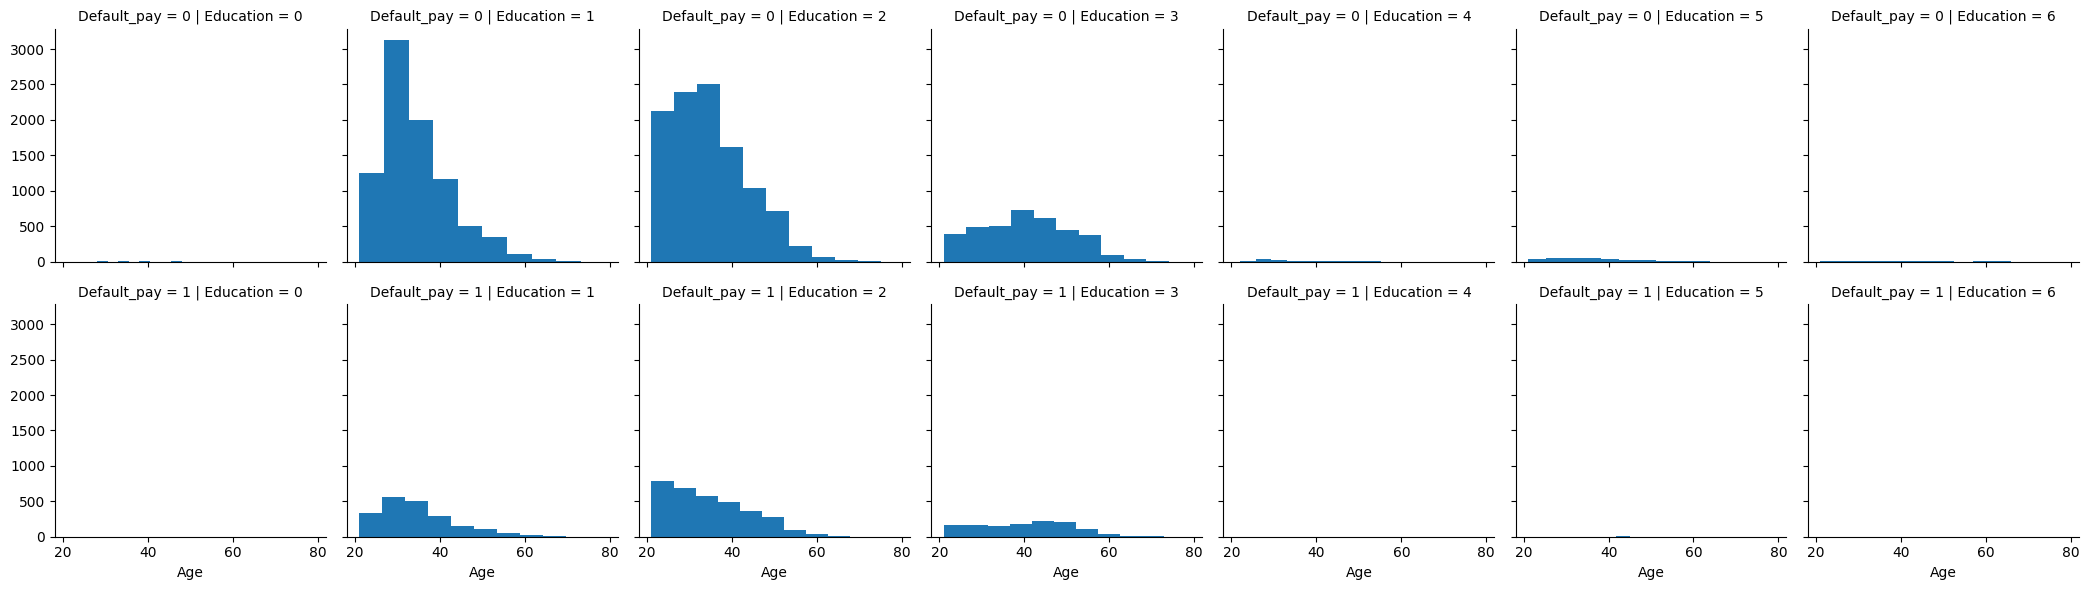

In [17]:
g = sns.FacetGrid(df1, row='Default_pay', col='Education')
g = g.map(plt.hist, 'Age')
plt.show()

People who are graduate or are in university of age 20-40 have high tendency to default payment compared to others.

## Feature Engeneering

In [18]:
df1=df1.drop('AGE_BIN',axis=1)

In [19]:
# change the datatype of categorical features from integer to category
df1.Sex = df1.Sex.astype("category")
df1.Education = df1.Education.astype("category")
df1.Marriage = df1.Marriage.astype("category")
df1.Pay_sept = df1.Pay_sept.astype("category")
df1.Pay_aug = df1.Pay_aug.astype("category")
df1.Pay_july = df1.Pay_july.astype("category")
df1.Pay_june = df1.Pay_june.astype("category")
df1.Pay_may = df1.Pay_may.astype("category")
df1.Pay_april = df1.Pay_april.astype("category")
df1.Default_pay = df1.Default_pay.astype("category")

In [20]:
df1.loc[df1['Education']==0,"Education"]=4
df1.loc[df1['Education']==5,"Education"]=4
df1.loc[df1['Education']==6,"Education"]=4
df1['Education'].nunique()

4

In [21]:
df1.loc[df1['Marriage']==0,"Marriage"]=3
df1['Marriage'].nunique()

3

## Over Sampling for Unbiased Data

In [24]:
logger.info('Oversampling data...')
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
x_smote,y_smote=smote.fit_resample(df1.iloc[:,0:-1].astype('float'),df1['Default_pay'])

In [25]:
columns=list(df1.columns)
df2=pd.DataFrame(x_smote,columns=columns)
df2["Default_pay"]=y_smote

In [26]:
df2

,Limit,Sex,Education,Marriage,Age,Pay_sept,Pay_aug,Pay_july,Pay_june,Pay_may,Pay_april,Bill_sept,Bill_aug,Bill_july,Bill_june,Bill_may,Bill_april,Amt_sept,Amt_aug,Amt_july,Amt_june,Amt_may,Amt_april,Default_pay
0,20000.000000,2.000000,2.000000,1.000000,24.000000,2.000000,2.000000,-1.000000,-1.000000,-2.000000,-2.000000,3913.000000,3102.000000,689.000000,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000,1
1,120000.000000,2.000000,2.000000,2.000000,26.000000,-1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,2682.000000,1725.000000,2682.000000,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,1
2,90000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29239.000000,14027.000000,13559.000000,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000,0
3,50000.000000,2.000000,2.000000,1.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46990.000000,48233.000000,49291.000000,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000,0
4,50000.000000,1.000000,2.000000,1.000000,57.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,8617.000000,5670.000000,35835.000000,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,462164.268649,1.216427,1.216427,1.000000,41.164269,1.567146,1.350719,3.701439,3.701439,3.701439,3.701439,2688.269190,2249.139081,3610.680489,3401.179283,2375.315944,1955.014972,294.124109,1655.665516,1446.164311,420.300972,0.000000,1270.425697,1
46724,35576.497730,1.442350,1.000000,2.000000,23.115300,0.884700,0.884700,0.000000,0.000000,0.000000,-0.442350,29694.345994,28646.618035,16550.609104,12672.613622,7794.437831,4339.875461,724.944705,1759.975670,620.240505,304.412443,342.084239,154.468987,1
46725,262277.075863,1.000000,1.818472,1.590764,33.772292,1.181528,1.181528,1.181528,1.181528,1.181528,1.181528,155844.179310,164066.687603,163884.824773,176985.751580,179204.686146,183003.869208,11316.877241,2864.651035,16945.592209,6132.419972,6201.990069,6045.222621,1
46726,278870.779545,1.112922,2.000000,1.112922,38.435390,-1.887078,-1.887078,-1.887078,-1.887078,-1.887078,-1.887078,1889.919601,3536.561110,5322.062749,5259.299131,4093.989610,3481.169948,3575.431889,5368.352620,5285.282833,4113.892986,3497.831182,3121.627322,1


## Splitting the Data

In [27]:
x=df2.drop('Default_pay',axis=1)
y=df2['Default_pay']

In [28]:
logger.info('Splitting data...')
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42
                                          ,stratify=y)
xtrain.to_csv('traindata.csv')
xtest.to_csv('testdata.csv')

## Scaling the Data

In [29]:
logger.info('Scaling data...')
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain1=scaler.fit_transform(xtrain)
xtest1=scaler.transform(xtest)

## Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
logger.info('Starting training of logistic regression')
lr=LogisticRegression()
model_lr=lr.fit(xtrain1,ytrain)
y_pred_lr=model_lr.predict(xtest1)

Logistic Regression model accuracy(in %): 69.241743348313


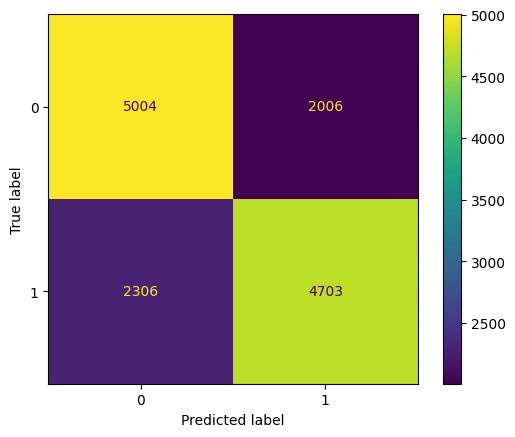

In [31]:
from sklearn.metrics import accuracy_score
accuracyreg=accuracy_score(ytest, y_pred_lr)*100
print("Logistic Regression model accuracy(in %):"
      ,accuracyreg)
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
treecon=confusion_matrix(ytest,y_pred_lr)
treedisp=ConfusionMatrixDisplay(treecon)
treedisp.plot()
tn, fp, fn, tp = treecon.ravel()
 
# Calculate precision, recall, and F1 score
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
    
logger.info(f'Finished training: precision {precision:.4f}, recall {recall:.4f}, f1 score {f1_score:.4f}, accuracy {accuracyreg:.4f}')

## Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
rnd=RandomForestClassifier(criterion= 'entropy', max_depth= 9, max_features= 6, n_estimators= 200)
logger.info('Starting training of random forest classifier')
model_rf=rnd.fit(xtrain1,ytrain)
rndpred=model_rf.predict(xtest1)

In [33]:
trainrndpred=rnd.predict(xtrain1)
print("Random Forest model Test accuracy(in %):"
      ,accuracy_score(ytest, rndpred)*100)
print("Random Forest model Train accuracy(in%):",accuracy_score(ytrain,trainrndpred)*100)

Random Forest model Test accuracy(in %): 86.40416577501962
Random Forest model Train accuracy(in%): 87.64560212785472


In [34]:
y_pred=model_rf.predict(xtest)

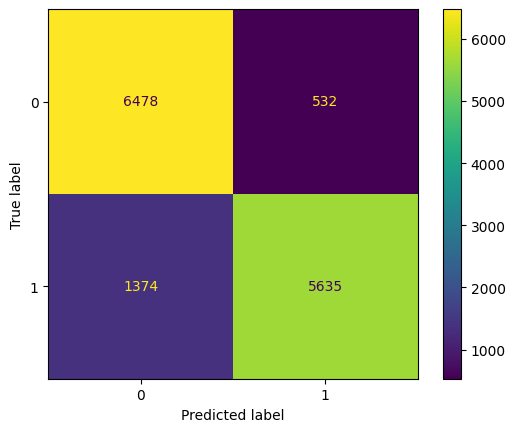

In [35]:
treecon=confusion_matrix(ytest,rndpred)
treedisp=ConfusionMatrixDisplay(treecon)
treedisp.plot()
accuracyrnd=accuracy_score(ytest, rndpred)*100
tn, fp, fn, tp = treecon.ravel()
 
# Calculate precision, recall, and F1 score
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
    
logger.info(f'Finished training: precision {precision:.4f}, recall {recall:.4f}, f1 score {f1_score:.4f}, accuracy {accuracyrnd:.4f}')

## Finding Best Parameter for Random Forest

In [36]:
#from sklearn.metrics import classification_report
#from time import time
#time_start=time()
#from sklearn.model_selection import GridSearchCV
#rfc_model = RandomForestClassifier(random_state = 7, class_weight='balanced', n_jobs=-1)
#params={"n_estimators":[150,200],
#        "max_features": [6,7],
#        'max_depth': [8,9],
#       "criterion":['entropy']}
#rfc_classifier = GridSearchCV(estimator = rfc_model, param_grid = params, scoring = "recall_weighted")
#rfc_classifier.fit(xtrain,ytrain)
#rfc_predict = rfc_classifier.predict(xtest)
#print(rfc_classifier.best_params_)
#print(classification_report(ytest, rfc_predict))
#time_end=time()
#print("Runtime  = ",time_end-time_start)

## SVM

In [37]:
from sklearn.svm import SVC

In [38]:
svc=SVC()
logger.info('Starting training of SVM')
svc.fit(xtrain1,ytrain)
svcpred=svc.predict(xtest1)

In [39]:
print("SVM(in %):" ,accuracy_score(ytest, svcpred)*100)

SVM(in %): 79.3993865468293


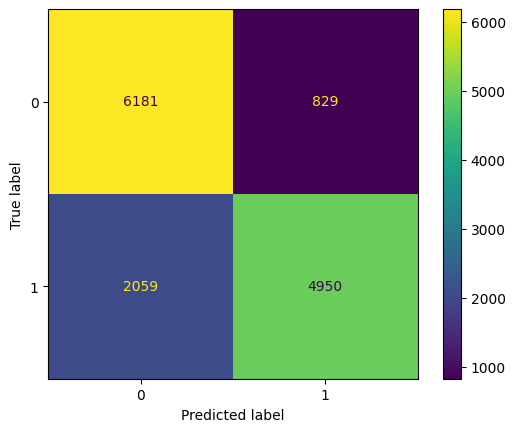

In [40]:
treecon=confusion_matrix(ytest,svcpred)
treedisp=ConfusionMatrixDisplay(treecon)
treedisp.plot()
accuracysvc=accuracy_score(ytest, svcpred)*100
tn, fp, fn, tp = treecon.ravel()
 
# Calculate precision, recall, and F1 score
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
    
logger.info(f'Finished training: precision {precision:.4f}, recall {recall:.4f}, f1 score {f1_score:.4f}, accuracy {accuracysvc:.4f}')

## Saving the Best Model as PKL File

In [41]:
logger.info('Saving best model')
file=open('randomforestclassifiermodel.pkl','wb')
pickle.dump(model_rf,file)